# Importing in libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, ttest_ind, wilcoxon, ttest_1samp
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('../Data/data.csv')

# Looking at univariant  analysis

In [3]:
df.head(10)

,PID,INNING_KEY,BATTER_IN_INNING_KEY,PITCH_NUMBER,OUT_KEY,BALLS,STRIKES,IS_RUNNER_ON_1B,IS_RUNNER_ON_2B,IS_RUNNER_ON_3B,...,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z
0,197,1,1,1,0,0,0,0,0,0,...,-12.36030,2402.459961,100.764999,-2.42717,6.08550,6.46,1.612990,-5.76003,0.197045,1.91282
1,348,1,2,1,1,0,0,0,0,0,...,-10.95030,2273.459961,100.431000,-2.52253,5.97044,6.56,0.631016,-4.60990,-0.943079,2.87744
2,1072,1,2,2,1,1,0,0,0,0,...,4.35335,2314.459961,89.848999,-2.64242,5.89410,6.71,3.330480,-6.76551,0.012025,2.16833
3,420,1,3,1,1,0,0,1,0,0,...,4.27254,2340.459961,89.810997,-2.52429,5.90717,6.55,3.804230,-6.87764,0.584736,2.11319
4,198,1,3,2,1,0,1,1,0,0,...,1.62418,2445.459961,89.014397,-2.68096,6.10905,6.37,2.385210,-5.89879,-0.634335,3.45222
5,328,1,3,3,1,1,1,1,0,0,...,-15.01970,2388.459961,100.691002,-2.34319,6.18732,6.40,1.082610,-4.71201,0.047688,2.72290
6,422,1,3,4,1,1,2,1,0,0,...,-13.90750,2409.459961,101.122002,-2.15292,6.19322,6.54,1.883650,-5.53768,0.864371,1.84169
7,1600,1,3,5,1,2,2,1,0,0,...,6.66157,2365.459961,92.038902,-2.43015,5.93383,6.36,4.465080,-7.71308,1.074930,1.28613
8,1073,1,3,6,1,3,2,1,0,0,...,-13.41770,2312.459961,101.325996,-2.29843,6.13551,6.46,2.101250,-4.37367,0.871809,2.86607
9,245,1,3,7,1,3,2,1,0,0,...,-12.82220,2320.459961,101.406998,-2.55810,5.96955,6.42,1.397000,-3.74020,-0.089948,3.52429


In [4]:
cols = sorted(list(df.columns))
cols

['BALLS',
 'BATTER_IN_INNING_KEY',
 'EVENT_RESULT_KEY',
 'HORIZONTAL_APPROACH_ANGLE',
 'HORIZONTAL_BREAK',
 'INDUCED_VERTICAL_BREAK',
 'INNING_KEY',
 'IS_RUNNER_ON_1B',
 'IS_RUNNER_ON_2B',
 'IS_RUNNER_ON_3B',
 'OUT_KEY',
 'PID',
 'PITCHER_KEY',
 'PITCH_NUMBER',
 'PITCH_RESULT_KEY',
 'PITCH_TYPE_TRACKED_KEY',
 'PLATE_X',
 'PLATE_Z',
 'RELEASE_EXTENSION',
 'RELEASE_HEIGHT',
 'RELEASE_SIDE',
 'RELEASE_SPEED',
 'SPIN_RATE_ABSOLUTE',
 'STRIKES',
 'THROW_SIDE_KEY',
 'VERTICAL_APPROACH_ANGLE']

## Checking the value counts of the features

In [5]:
#Get a Count for the values of our features
for i in cols:
    value_counts = df[i].value_counts()
    value_counts_df = pd.DataFrame({i: value_counts})  
    value_counts_df = value_counts_df.rename(columns={f"{i}": "count"})
    display(value_counts_df) 

,count
BALLS,
0,4447
1,2968
2,1665
3,809


,count
BATTER_IN_INNING_KEY,
1,2285
2,2282
3,2250
4,1500
5,765
6,422
7,193
8,108
9,34


,count
EVENT_RESULT_KEY,
field_out,1041
strikeout,547
single,348
walk,215
double,118
home_run,113
grounded_into_double_play,43
force_out,41
hit_by_pitch,38


,count
HORIZONTAL_APPROACH_ANGLE,
3.292600,2
4.395360,2
2.248570,2
2.205310,2
1.754980,2
...,...
1.689500,1
4.211310,1
0.516630,1


,count
HORIZONTAL_BREAK,
17.048201,2
-17.055901,2
-11.924700,2
10.886600,2
-13.836900,2
...,...
6.935320,1
-3.897800,1
-14.054100,1


,count
INDUCED_VERTICAL_BREAK,
15.20510,3
14.76040,3
14.54220,2
16.53120,2
14.72450,2
...,...
13.95940,1
11.91580,1
2.67763,1


,count
INNING_KEY,
1,1154
2,1141
3,1110
6,1089
9,1088
7,1067
4,1057
8,1049
5,1007


,count
IS_RUNNER_ON_1B,
0,6825
1,3064


,count
IS_RUNNER_ON_2B,
0,8162
1,1727


,count
IS_RUNNER_ON_3B,
0,8880
1,1009


,count
OUT_KEY,
0,3355
2,3332
1,3202


,count
PID,
197,1
14966,1
22261,1
23009,1
20633,1
...,...
14101,1
14859,1
15444,1


,count
PITCHER_KEY,
668933,1187
671096,776
682227,724
596133,676
668881,516
594902,494
666157,463
571656,434
664747,427


,count
PITCH_NUMBER,
1,2571
2,2274
3,1884
4,1407
5,948
6,506
7,186
8,69
9,21


,count
PITCH_RESULT_KEY,
BallCalled,3579
FoulBall,1813
InPlay,1764
StrikeCalled,1593
StrikeSwinging,1102
HitByPitch,38


,count
PITCH_TYPE_TRACKED_KEY,
FB,3295
SW,1716
CF,1307
CH,1198
SL,909
SI,815
CB,469
SF,173
UN,4


,count
PLATE_X,
1.050350,2
0.267886,2
-0.298182,2
-0.189584,2
0.086153,2
...,...
0.706714,1
1.117710,1
1.349090,1


,count
PLATE_Z,
2.20106,3
1.97302,3
2.74715,3
1.89789,3
1.77433,2
...,...
3.23367,1
4.34103,1
2.07803,1


,count
RELEASE_EXTENSION,
5.67,110
5.69,100
5.77,99
5.78,98
5.72,98
...,...
8.04,1
5.28,1
4.45,1


,count
RELEASE_HEIGHT,
5.74366,3
5.65555,3
6.09083,3
5.77705,3
5.92595,3
...,...
5.94936,1
5.96772,1
6.03077,1


,count
RELEASE_SIDE,
-1.61309,3
-1.43008,3
-1.42701,3
-1.39770,2
-1.61958,2
...,...
-1.66320,1
-1.33513,1
-1.50394,1


,count
RELEASE_SPEED,
94.876801,3
94.610298,3
84.284103,3
85.835999,3
87.398804,3
...,...
90.951103,1
91.111198,1
82.126701,1


,count
SPIN_RATE_ABSOLUTE,
2388.459961,6
2302.459961,6
2319.459961,6
2337.459961,5
2216.459961,5
...,...
2830.100098,1
2579.100098,1
2794.100098,1


,count
STRIKES,
0,4041
1,3045
2,2803


,count
THROW_SIDE_KEY,
R,7268
L,2621


,count
VERTICAL_APPROACH_ANGLE,
-7.37275,2
-6.74043,2
-6.07077,2
-4.66459,2
-4.80448,2
...,...
-6.37527,1
-7.43548,1
-5.17212,1


## Checking for null values

According to the analysis, the only field with null values is Event_result_key which according to our data dictionary represents the result after a thrown pitch and the pitch ends in a plate Appearance ending event. Therefore I concluded that the null values in Event_result_key are events that did not end a plate appearance.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9889 entries, 0 to 9888
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PID                        9889 non-null   int64  
 1   INNING_KEY                 9889 non-null   int64  
 2   BATTER_IN_INNING_KEY       9889 non-null   int64  
 3   PITCH_NUMBER               9889 non-null   int64  
 4   OUT_KEY                    9889 non-null   int64  
 5   BALLS                      9889 non-null   int64  
 6   STRIKES                    9889 non-null   int64  
 7   IS_RUNNER_ON_1B            9889 non-null   int64  
 8   IS_RUNNER_ON_2B            9889 non-null   int64  
 9   IS_RUNNER_ON_3B            9889 non-null   int64  
 10  PITCHER_KEY                9889 non-null   int64  
 11  THROW_SIDE_KEY             9889 non-null   object 
 12  PITCH_TYPE_TRACKED_KEY     9889 non-null   object 
 13  EVENT_RESULT_KEY           2631 non-null   objec

In [7]:
df['EVENT_RESULT_KEY'].isnull().sum()

7258

In [8]:
df['EVENT_RESULT_KEY'].value_counts()

EVENT_RESULT_KEY
field_out                     1041
strikeout                      547
single                         348
walk                           215
double                         118
home_run                       113
grounded_into_double_play       43
force_out                       41
hit_by_pitch                    38
stolen_base_2b                  33
sac_fly                         16
wild_pitch                      16
fielders_choice                 12
triple                          10
field_error                      9
caught_stealing_2b               7
sac_bunt                         5
stolen_base_3b                   4
double_play                      3
passed_ball                      3
catcher_interf                   2
fielders_choice_out              2
strikeout_double_play            2
pickoff_caught_stealing_2b       1
pickoff_caught_stealing_3b       1
sac_fly_double_play              1
Name: count, dtype: int64

In [9]:
df.loc[df['EVENT_RESULT_KEY'].isnull(), ['PITCH_RESULT_KEY', 'EVENT_RESULT_KEY', 'PITCH_TYPE_TRACKED_KEY', 'THROW_SIDE_KEY']]

,PITCH_RESULT_KEY,EVENT_RESULT_KEY,PITCH_TYPE_TRACKED_KEY,THROW_SIDE_KEY
1,BallCalled,NaN,FB,R
3,FoulBall,NaN,SL,R
4,BallCalled,NaN,SL,R
5,FoulBall,NaN,FB,R
6,BallCalled,NaN,FB,R
...,...,...,...,...
9881,FoulBall,NaN,CF,R
9883,BallCalled,NaN,FB,R
9884,StrikeCalled,NaN,FB,R
9885,BallCalled,NaN,CF,R


In [10]:
df.loc[df['EVENT_RESULT_KEY'].notnull(), ['PITCH_RESULT_KEY', 'EVENT_RESULT_KEY', 'PITCH_TYPE_TRACKED_KEY', 'THROW_SIDE_KEY']]

,PITCH_RESULT_KEY,EVENT_RESULT_KEY,PITCH_TYPE_TRACKED_KEY,THROW_SIDE_KEY
0,InPlay,field_out,FB,R
2,InPlay,single,SL,R
9,BallCalled,walk,FB,R
13,StrikeSwinging,strikeout,FB,R
18,StrikeCalled,strikeout,SL,R
...,...,...,...,...
9875,FoulBall,strikeout,CH,R
9880,InPlay,single,CH,R
9882,InPlay,field_out,CH,R
9887,InPlay,double,CH,R


In [11]:
# Choosing vertical and horizontal break because I assume this is how we identify dew point
df.loc[:, ['PITCH_TYPE_TRACKED_KEY', 'INDUCED_VERTICAL_BREAK', 'HORIZONTAL_BREAK']]

,PITCH_TYPE_TRACKED_KEY,INDUCED_VERTICAL_BREAK,HORIZONTAL_BREAK
0,FB,14.54220,-12.36030
1,FB,14.25380,-10.95030
2,SL,5.56877,4.35335
3,SL,4.80541,4.27254
4,SL,4.13239,1.62418
...,...,...,...
9884,FB,15.72580,-8.54239
9885,CF,10.86980,0.60670
9886,FB,14.10840,-10.84110
9887,CH,10.49140,-13.44000


# Distribution of Vertical and horizontal break

According to our data dictionary, this calculates Pitch movement due to environmental factors, Therefore I assume this feature can be used to determine if a pitch was influenced by the dew point of the stadium.

In [12]:
df.loc[:, ['INDUCED_VERTICAL_BREAK', 'HORIZONTAL_BREAK']].describe()

,INDUCED_VERTICAL_BREAK,HORIZONTAL_BREAK
count,9889.000000,9889.000000
mean,6.937282,-0.370263
std,7.749274,11.163954
min,-21.982201,-25.363899
25%,1.593640,-9.955600
50%,7.065330,-0.769889
75%,13.751000,8.787780
max,22.767300,26.991199


According to the histogram below it appears the vertical break has a left skew and the horizontal break has a bimodal distribution.

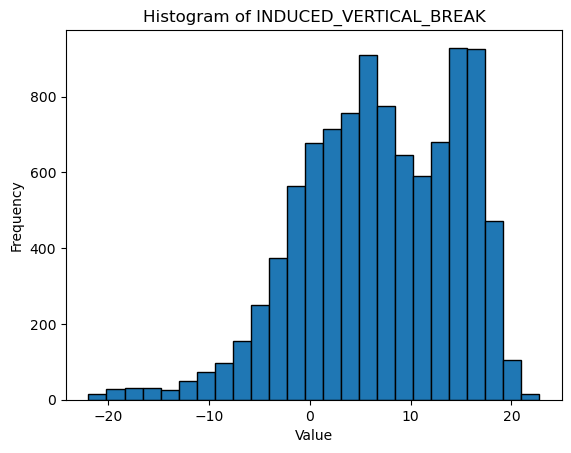

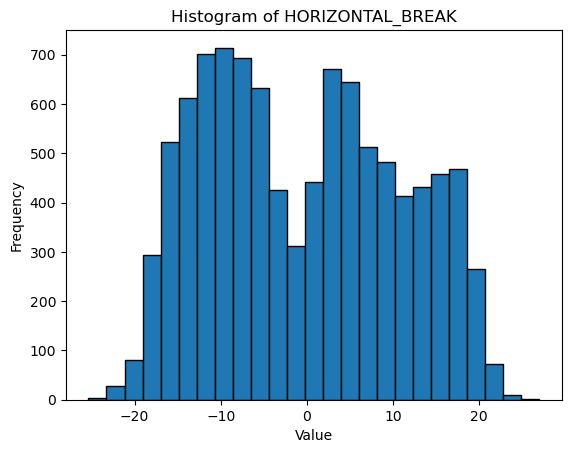

In [13]:
_df = df.loc[:, ['INDUCED_VERTICAL_BREAK', 'HORIZONTAL_BREAK']]

for column in _df.columns:
    plt.hist(df[column], bins=25, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

## Looking at correlation between the features

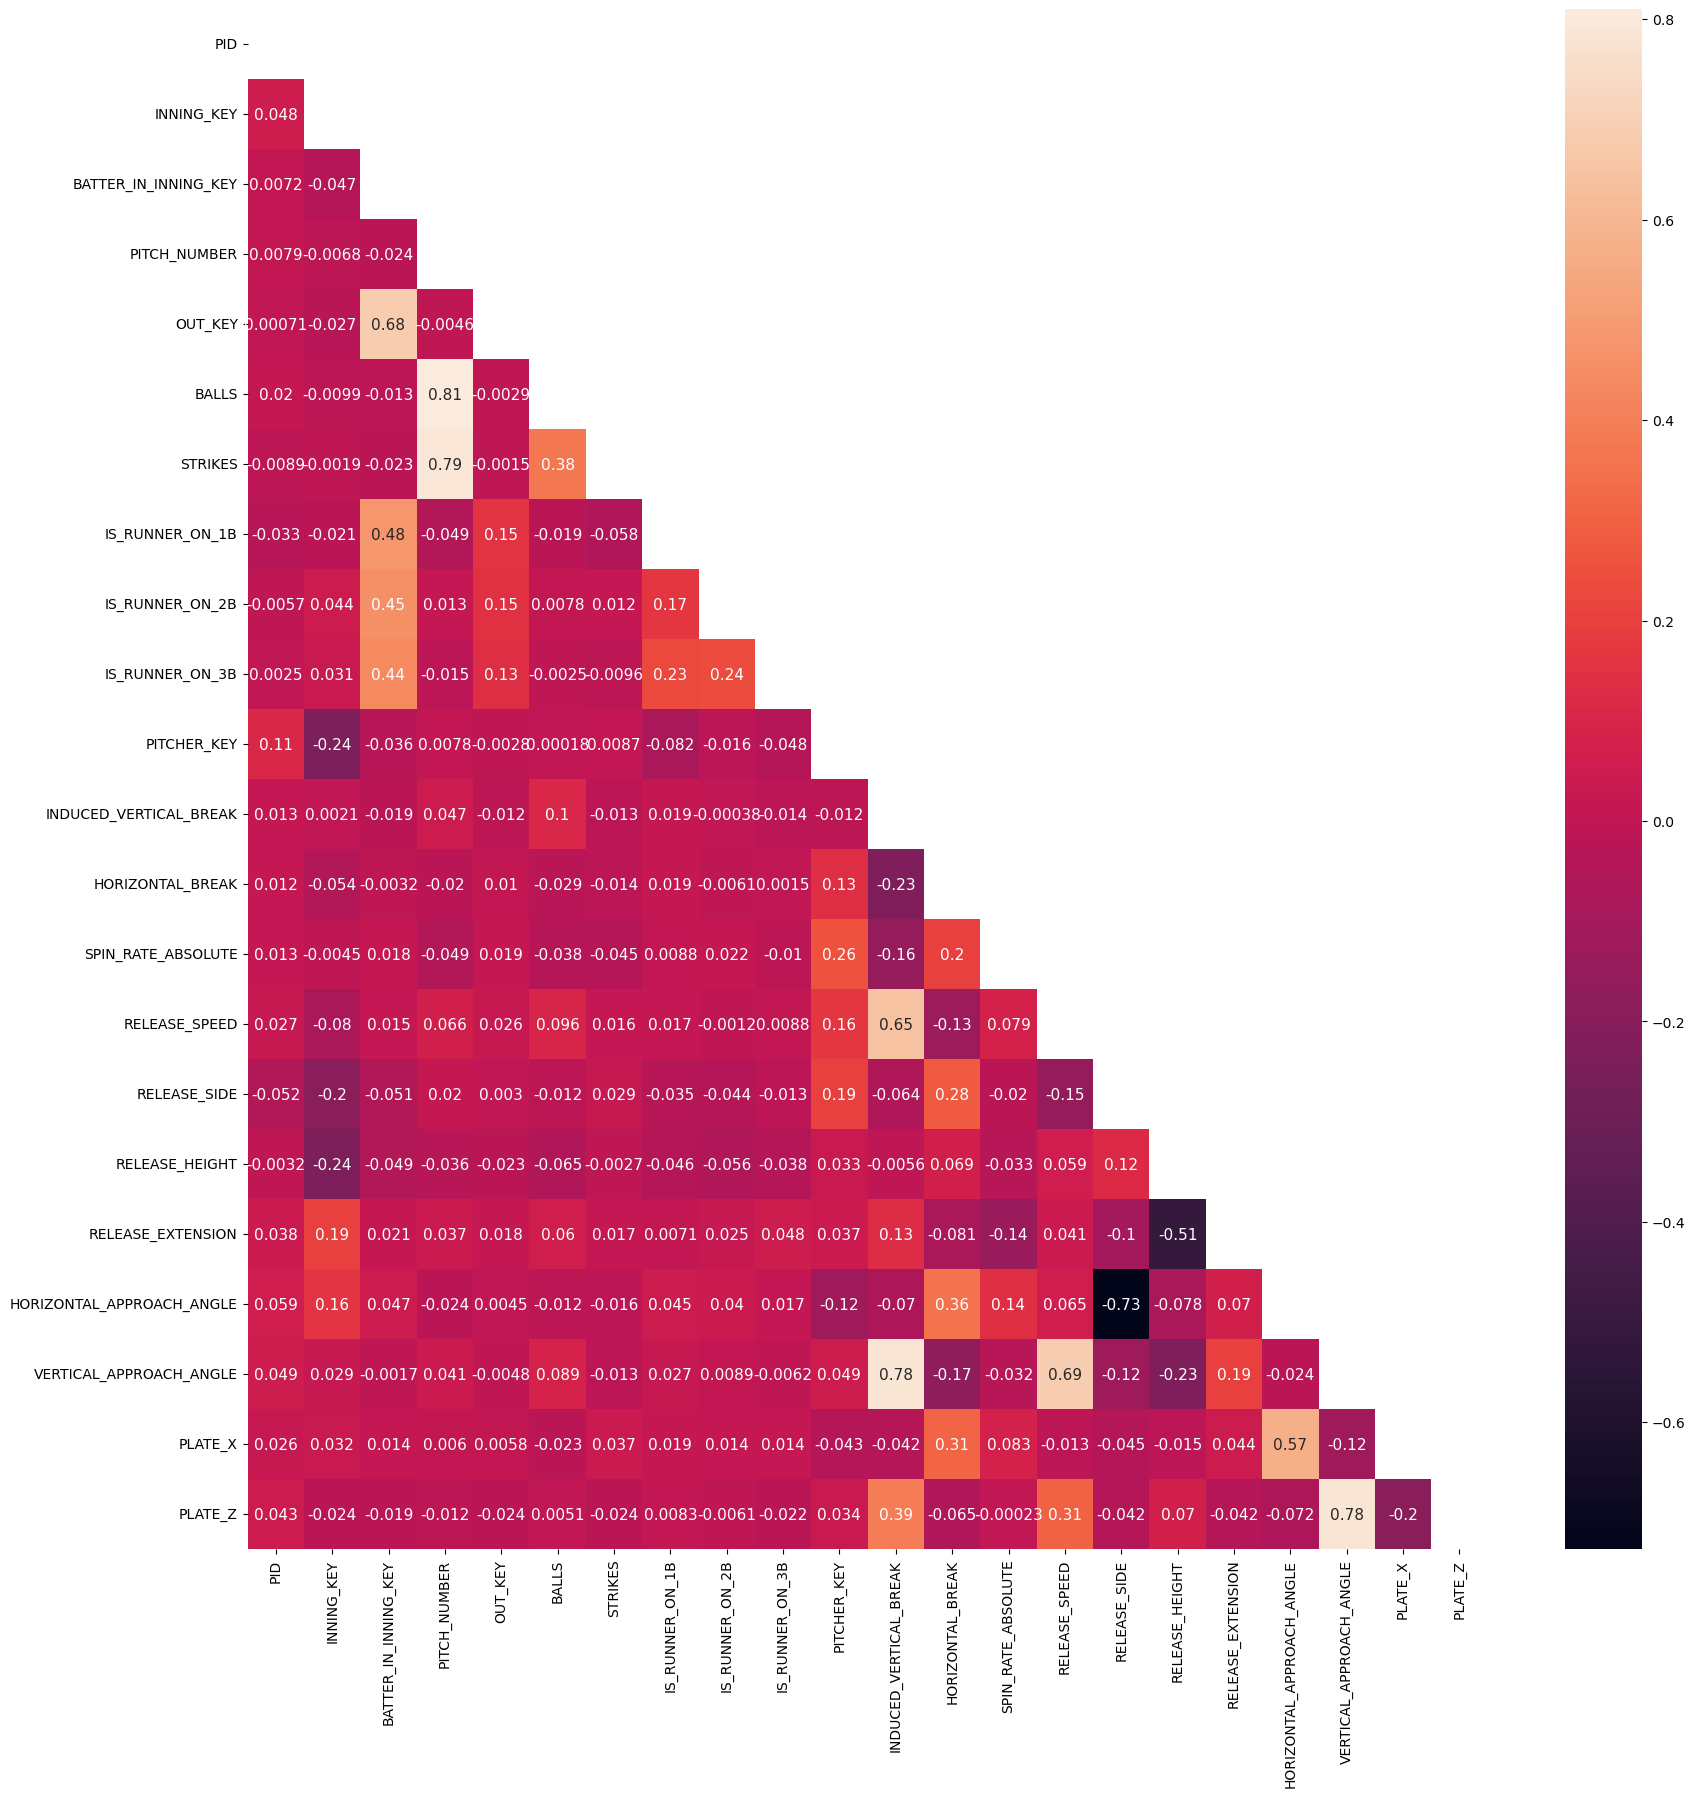

In [14]:
"""
Here we look at the overall correlation of all our numeric features to identify any correlations.
"""

numeric_df = df.select_dtypes(include=[np.number])
# Calculate the correlation
feat_corr = numeric_df.corr()

# Create a mask to hide the duplicated values
mask = np.zeros_like(feat_corr)
mask[np.triu_indices_from(mask)] = True

# Plot the correlation heatmap with larger font size
plt.figure(figsize=(20, 20))
sns.heatmap(feat_corr, mask=mask, annot=True, annot_kws={"size": 11})
plt.show()

# Feature selection

Here we select features to identify the id of the pitch, pitch characteristics on release, and pitch characteristics on approach. My logic here is to if pitches of similar characteristics change based on the horizontal and vertical break characteristics. According to the data dictionary, those features will identify how environmental features would effect a pitch which would give me a better since of identify dew point's impact on a pitch.

In [15]:
model_df = df[['PID','INDUCED_VERTICAL_BREAK','HORIZONTAL_BREAK','RELEASE_SPEED','SPIN_RATE_ABSOLUTE','HORIZONTAL_APPROACH_ANGLE', 'VERTICAL_APPROACH_ANGLE', 'RELEASE_HEIGHT']]
model_df.head()

,PID,INDUCED_VERTICAL_BREAK,HORIZONTAL_BREAK,RELEASE_SPEED,SPIN_RATE_ABSOLUTE,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,RELEASE_HEIGHT
0,197,14.54220,-12.36030,100.764999,2402.459961,1.612990,-5.76003,6.08550
1,348,14.25380,-10.95030,100.431000,2273.459961,0.631016,-4.60990,5.97044
2,1072,5.56877,4.35335,89.848999,2314.459961,3.330480,-6.76551,5.89410
3,420,4.80541,4.27254,89.810997,2340.459961,3.804230,-6.87764,5.90717
4,198,4.13239,1.62418,89.014397,2445.459961,2.385210,-5.89879,6.10905


# Correlation plots

Based on our correlation matrix I wanted to plot the features (that we selected) and get some statistical information such as R values and RMSE.

In [16]:
def cor_plot(feat1, feat2, _df):
    r= pearsonr(_df[feat1], df[feat2])
    r2 = r[0]**2
    
    sr = spearmanr(_df[feat1], df[feat2])
    sr2= sr[0]**2
    sr[0], sr2, sr[-1]
    
    t= ttest_ind(_df[feat1], df[feat2])
    t[0], t[-1]
    
    #rmse
    rmse= mean_squared_error(_df[feat1], df[feat2])**.5
    title= f"""
    {feat1} and {feat2}
    Pearson r: {round(r[0],3)} P-value: {round(r[-1],3)}
    Spearmen r: {round(sr[0],3)} P-value: {round(sr[-1],3)}
    T-test: {round(t[0],3)} P-value: {round(t[1],3)}
    RMSE: {round(rmse,3)}
    """
    sns.jointplot(data=_df, x=feat1,y =feat2, kind='reg')
    plt.title(title)
    plt.show()
    print(title)

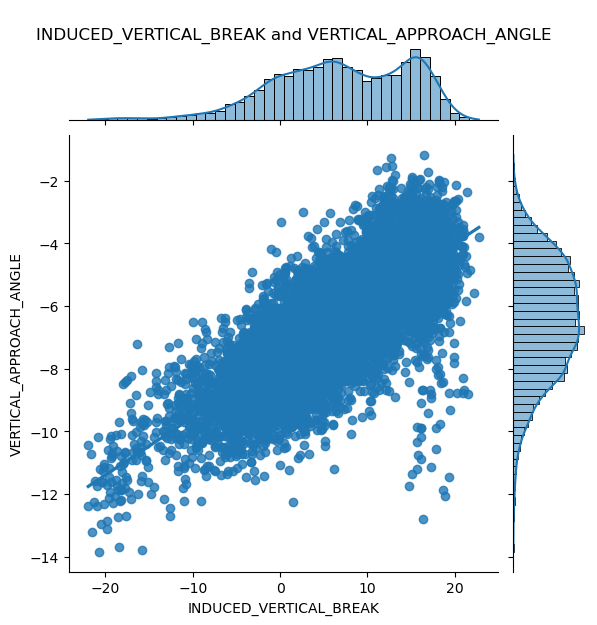


    INDUCED_VERTICAL_BREAK and VERTICAL_APPROACH_ANGLE
    Pearson r: 0.781 P-value: 0.0
    Spearmen r: 0.781 P-value: 0.0
    T-test: 166.752 P-value: 0.0
    RMSE: 14.816
    


In [17]:
cor_plot('INDUCED_VERTICAL_BREAK', 'VERTICAL_APPROACH_ANGLE', model_df)

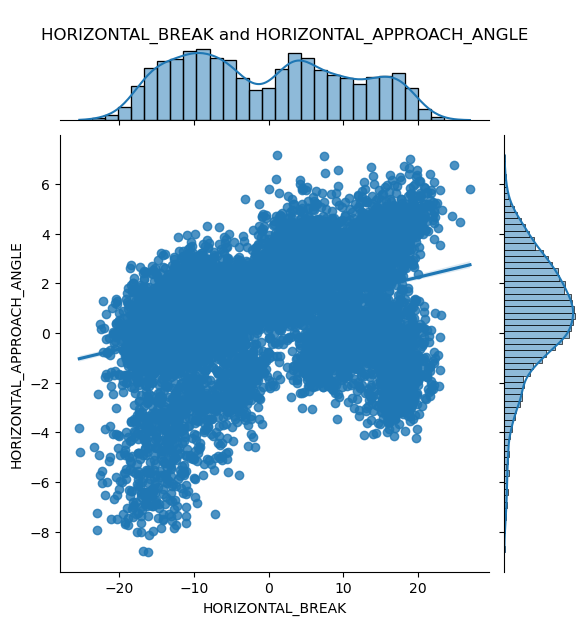


    HORIZONTAL_BREAK and HORIZONTAL_APPROACH_ANGLE
    Pearson r: 0.355 P-value: 0.0
    Spearmen r: 0.336 P-value: 0.0
    T-test: -9.94 P-value: 0.0
    RMSE: 10.634
    


In [18]:
cor_plot('HORIZONTAL_BREAK', 'HORIZONTAL_APPROACH_ANGLE', model_df)

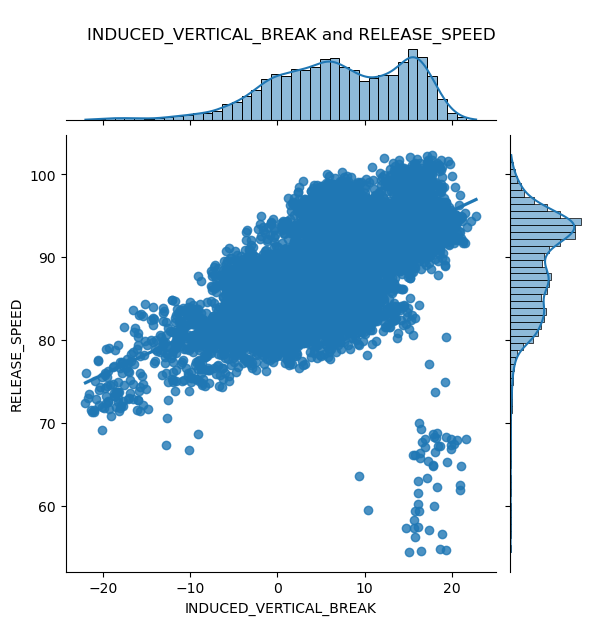


    INDUCED_VERTICAL_BREAK and RELEASE_SPEED
    Pearson r: 0.647 P-value: 0.0
    Spearmen r: 0.669 P-value: 0.0
    T-test: -837.991 P-value: 0.0
    RMSE: 82.424
    


In [19]:
cor_plot('INDUCED_VERTICAL_BREAK', 'RELEASE_SPEED', model_df)

In [20]:
df.head(10)

,PID,INNING_KEY,BATTER_IN_INNING_KEY,PITCH_NUMBER,OUT_KEY,BALLS,STRIKES,IS_RUNNER_ON_1B,IS_RUNNER_ON_2B,IS_RUNNER_ON_3B,...,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z
0,197,1,1,1,0,0,0,0,0,0,...,-12.36030,2402.459961,100.764999,-2.42717,6.08550,6.46,1.612990,-5.76003,0.197045,1.91282
1,348,1,2,1,1,0,0,0,0,0,...,-10.95030,2273.459961,100.431000,-2.52253,5.97044,6.56,0.631016,-4.60990,-0.943079,2.87744
2,1072,1,2,2,1,1,0,0,0,0,...,4.35335,2314.459961,89.848999,-2.64242,5.89410,6.71,3.330480,-6.76551,0.012025,2.16833
3,420,1,3,1,1,0,0,1,0,0,...,4.27254,2340.459961,89.810997,-2.52429,5.90717,6.55,3.804230,-6.87764,0.584736,2.11319
4,198,1,3,2,1,0,1,1,0,0,...,1.62418,2445.459961,89.014397,-2.68096,6.10905,6.37,2.385210,-5.89879,-0.634335,3.45222
5,328,1,3,3,1,1,1,1,0,0,...,-15.01970,2388.459961,100.691002,-2.34319,6.18732,6.40,1.082610,-4.71201,0.047688,2.72290
6,422,1,3,4,1,1,2,1,0,0,...,-13.90750,2409.459961,101.122002,-2.15292,6.19322,6.54,1.883650,-5.53768,0.864371,1.84169
7,1600,1,3,5,1,2,2,1,0,0,...,6.66157,2365.459961,92.038902,-2.43015,5.93383,6.36,4.465080,-7.71308,1.074930,1.28613
8,1073,1,3,6,1,3,2,1,0,0,...,-13.41770,2312.459961,101.325996,-2.29843,6.13551,6.46,2.101250,-4.37367,0.871809,2.86607
9,245,1,3,7,1,3,2,1,0,0,...,-12.82220,2320.459961,101.406998,-2.55810,5.96955,6.42,1.397000,-3.74020,-0.089948,3.52429


In [21]:
model_df['DIFFERENCE'] = model_df['HORIZONTAL_BREAK'] - model_df['HORIZONTAL_APPROACH_ANGLE']
model_df['DIFFERENCE'].head(10)

C:\Users\Derik\AppData\Local\Temp\ipykernel_6108\2079898877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['DIFFERENCE'] = model_df['HORIZONTAL_BREAK'] - model_df['HORIZONTAL_APPROACH_ANGLE']


0   -13.973290
1   -11.581316
2     1.022870
3     0.468310
4    -0.761030
5   -16.102310
6   -15.791150
7     2.196490
8   -15.518950
9   -14.219200
Name: DIFFERENCE, dtype: float64

In [22]:
t_stat, p_value = ttest_1samp(model_df['DIFFERENCE'], 0)
print(t_stat, p_value)

-10.709959228267083 1.2788189710260432e-26


Given our P value, we can reject the null hypothesis and conclude that the environmental factors from horizontal break is statistically significant. I will use this to determine the categories for a logistical regression to obtain the probability of the model being impacted by environmental factors. With more knowledge and research I believe the break features would allow me to separate out specific environmental features such as gravity, temperature, and dew point. Which would allow me to filter our dataframe and obtain only games that are above 65 degrees.

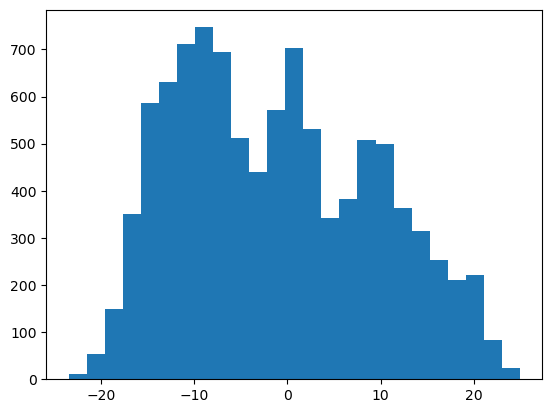

In [23]:
plt.hist(x=model_df['DIFFERENCE'], bins=25);

In [24]:
model_df[model_df['DIFFERENCE']>0]

,PID,INDUCED_VERTICAL_BREAK,HORIZONTAL_BREAK,RELEASE_SPEED,SPIN_RATE_ABSOLUTE,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,RELEASE_HEIGHT,DIFFERENCE
2,1072,5.56877,4.353350,89.848999,2314.459961,3.33048,-6.76551,5.89410,1.022870
3,420,4.80541,4.272540,89.810997,2340.459961,3.80423,-6.87764,5.90717,0.468310
7,1600,5.34781,6.661570,92.038902,2365.459961,4.46508,-7.71308,5.93383,2.196490
11,329,1.99802,5.253620,89.532303,2420.459961,2.23496,-7.10519,5.99033,3.018660
18,1735,3.47282,6.918150,91.016800,2394.459961,2.60078,-7.42512,6.02372,4.317370
...,...,...,...,...,...,...,...,...,...
9836,24170,7.69206,5.425900,90.816803,2608.620117,2.35295,-5.82211,5.80661,3.072950
9838,22726,3.44245,16.730301,83.885597,2806.620117,4.58959,-8.09637,5.67457,12.140711
9841,24793,9.94238,3.980280,91.851196,2592.620117,1.18300,-5.97979,5.72098,2.797280
9846,24467,9.66062,3.197590,91.541298,2536.620117,2.72728,-6.38958,5.67449,0.470310


# Modeling

Here we will build models to predict the drop in approach angel when accounting for atmospheric factors and when not accounting for the atmospheric factors. I want to do it with a logistic regression and use predict_proba then find the difference between using different target variables; however, out target variable is continuous so ill have to use a linear regression. 

In [25]:
model_df.set_index(['PID'], inplace=True)

In [26]:
model_df.head(5)

,INDUCED_VERTICAL_BREAK,HORIZONTAL_BREAK,RELEASE_SPEED,SPIN_RATE_ABSOLUTE,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,RELEASE_HEIGHT,DIFFERENCE
PID,,,,,,,,
197,14.54220,-12.36030,100.764999,2402.459961,1.612990,-5.76003,6.08550,-13.973290
348,14.25380,-10.95030,100.431000,2273.459961,0.631016,-4.60990,5.97044,-11.581316
1072,5.56877,4.35335,89.848999,2314.459961,3.330480,-6.76551,5.89410,1.022870
420,4.80541,4.27254,89.810997,2340.459961,3.804230,-6.87764,5.90717,0.468310
198,4.13239,1.62418,89.014397,2445.459961,2.385210,-5.89879,6.10905,-0.761030


In [28]:
X= df[['RELEASE_SPEED','SPIN_RATE_ABSOLUTE','HORIZONTAL_BREAK', 'VERTICAL_APPROACH_ANGLE', 'RELEASE_HEIGHT']]
y = df['HORIZONTAL_APPROACH_ANGLE']
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, random_state = 42)
lr1 = LogisticRegression()
lr_angle= lr1.fit(X1_train, y1_train)

In [30]:
X= df[['RELEASE_SPEED','SPIN_RATE_ABSOLUTE','HORIZONTAL_APPROACH_ANGLE', 'VERTICAL_APPROACH_ANGLE', 'RELEASE_HEIGHT']]
y = df['HORIZONTAL_BREAK']
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, random_state = 42)
lr2 = LogisticRegression()
lr_break= lr2.fit(X2_train, y2_train)


In [32]:

print( f'{r2_score(y1_test, lra).round(2)} is the r2 of our lra data')
print( f'{r2_score(y2_test, lrb).round(2)} is the r2 of our lrb data')



0.16 is the r2 of our lra data
0.18 is the r2 of our lrb data


In [33]:
lra.shape

(2473,)

In [34]:
lrb.shape

(2473,)